In [1]:
import csv
import datetime

def to_minutes(timestr):
    minutes = 0
    for part in timestr.split(':'):
        minutes = minutes*60 + int(part)
    return minutes

trainings = {
    '1': {
        'date': '2020-12-11',
        'start': '13:29',
        'finish': '14:05'
    },
    '2': {
        'date': '2020-12-11',
        'start': '18:10',
        'finish': '19:09'
    },
    '3': {
        'date': '2020-12-12',
        'start': '14:18',
        'finish': '14:48'
    },
    '4': {
        'date': '2020-12-13',
        'start': '17:19',
        'finish': '18:18'
    },
    '5': {
        'date': '2020-12-23',
        'start': '13:04',
        'finish': '13:54' 
    },
    '6': {
        'date': '2020-12-25',
        'start': '19:39',
        'finish': '21:35'
    },
    '7': {
        'date': '2020-12-27',
        'start': '17:33',
        'finish': '18:47'
    }
}

glucose_info = []

with open('BG.txt', 'r') as bg_file:
    for _ in range(3):
        next(bg_file)
    for training in trainings.items():
        required_date = training[1]['date']
        required_start = to_minutes(training[1]['start'])
        required_finish = to_minutes(training[1]['finish'])
        
        glucose_list = []
        
        for line in bg_file:
            line = line.split()
            date = line[1]
            time = to_minutes(line[2])
            glucose = line[4]
            if date != required_date.replace('-','/'):
                continue
            if (time <= required_start - 30):
                continue
            if (time >= required_finish + 30):
                continue
            glucose_list.append((float(glucose), int(time)))
    
        glucose_list = sorted(glucose_list, key=lambda x: x[1])                       
        return_dict = {
            'name': training[0],
            'date': training[1]['date'],
            'glucose_list': glucose_list 
        }
        glucose_info.append(return_dict)
        
        bg_file.seek(0)
        for _ in range(3):
            next(bg_file)
            
heart_rate_info = []
        
for training in trainings.items():
    required_date = training[1]['date']
    required_start = to_minutes(training[1]['start'])
    required_finish = to_minutes(training[1]['finish'])
    
    heart_rate_list = []
    
    with open('HR.csv', 'r') as hr_file:
        csv_reader = csv.reader(hr_file, delimiter=',')
        count = 0
        for row in csv_reader:
            if count == 0:
                count += 1
                continue
            count += 1
            date = row[0]
            time = to_minutes(row[1])
            heart_rate = row[2]
            if date != required_date:
                continue
            if (time < required_start):
                continue
            if (time > required_finish):
                continue
            heart_rate_list.append((float(heart_rate), int(time)))

        #heart_rate_list = sorted(heart_rate_list, key=lambda x: x[1])
            
        return_dict = {
            'name': training[0],
            'date': training[1]['date'],
            'hr_list': heart_rate_list 
        }
        heart_rate_info.append(return_dict)

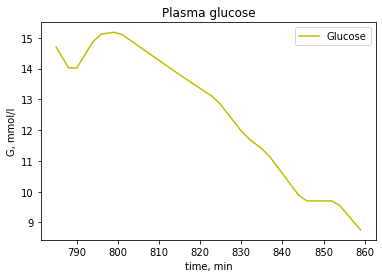

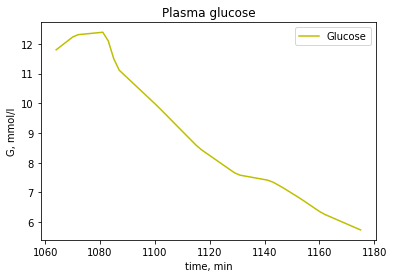

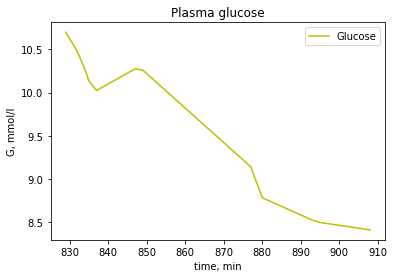

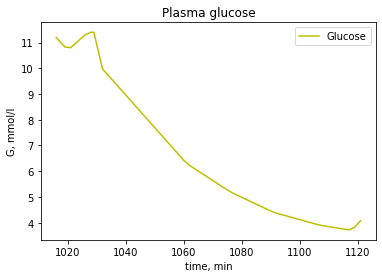

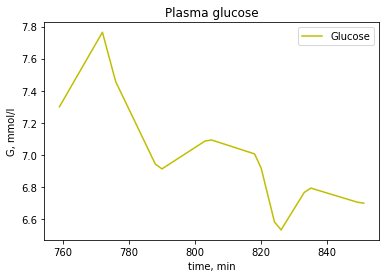

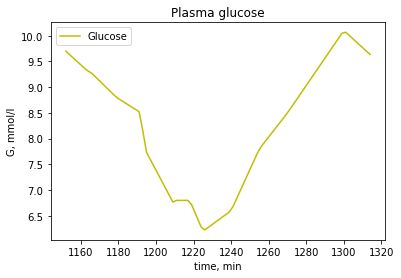

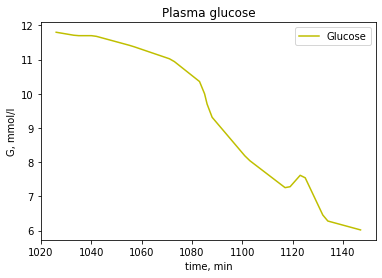

In [2]:
import numpy as np
import matplotlib.pyplot as plt

for info in glucose_info:

    start_time = info['glucose_list'][0][1]
    end_time = info['glucose_list'][-1][1]

    final_glucose_list = []
    final_time_list = []
    g_prev = info['glucose_list'][0][0]
    t_prev = info['glucose_list'][0][1]

    final_glucose_list.append(g_prev)
    final_time_list.append(t_prev)

    for g, t in info['glucose_list'][1:]:
        curr_t = t_prev + 1
        while(curr_t < t):
            # линейная интерполяция
            glucose_new = g_prev + (curr_t - t_prev) * (g - g_prev)/(t - t_prev)
            final_glucose_list.append(glucose_new)
            final_time_list.append(curr_t)
            curr_t += 1
        g_prev = g
        t_prev = t

    plt.plot(final_time_list, final_glucose_list, label='Glucose', color='y')
    plt.title('Plasma glucose')
    plt.ylabel('G, mmol/l')
    plt.xlabel('time, min')
    plt.legend()
    plt.show()

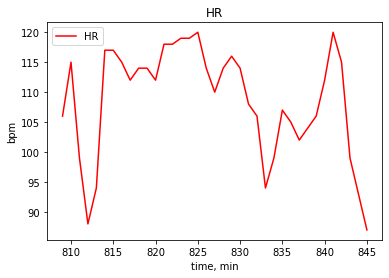

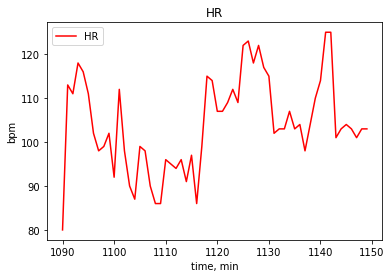

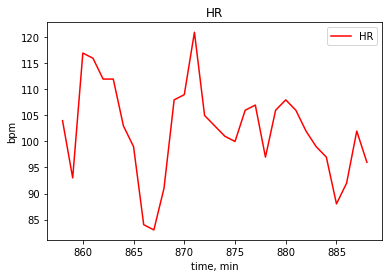

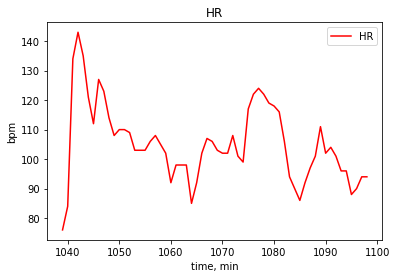

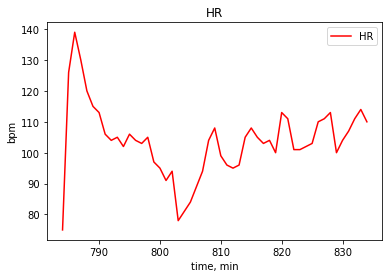

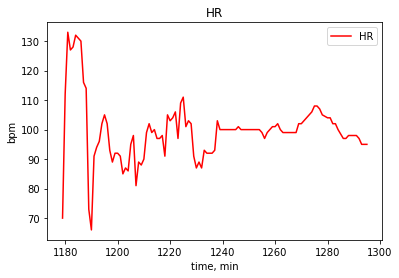

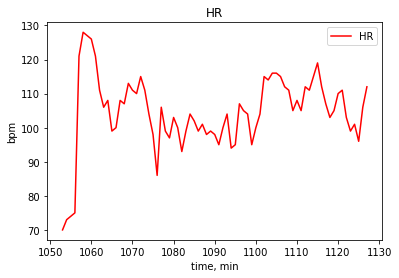

In [147]:
for info in heart_rate_info:
    bg_arr = []
    t_arr = []
    for bg, t in info['hr_list']:
        bg_arr.append(bg)
        t_arr.append(t)
    
    plt.plot(t_arr, bg_arr, label='HR', color='r')
    plt.title('HR')
    plt.ylabel('bpm')
    plt.xlabel('time, min')
    plt.legend()
    plt.show()
    